In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

LOAD THE DATASET

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\marketbasketanalysis\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.columns=["Id","Sex","Age","Income(k$)","Expense"]
df.head()

,Id,Sex,Age,Income(k$),Expense
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Sex         200 non-null    object
 2   Age         200 non-null    int64 
 3   Income(k$)  200 non-null    int64 
 4   Expense     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,Id,Age,Income(k$),Expense
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CHECK EACH COLUMN

<Axes: xlabel='Sex', ylabel='count'>

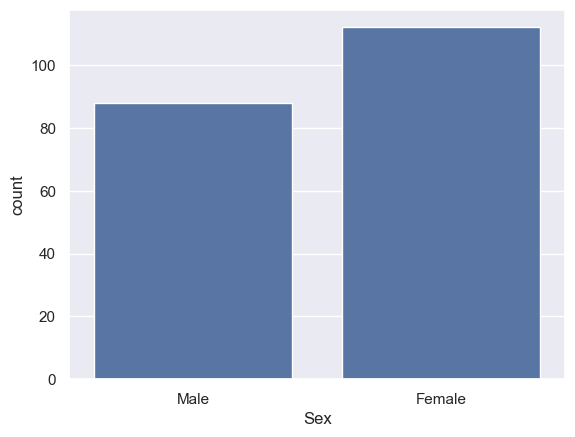

In [7]:
sns.countplot(data=df,x='Sex')

<Axes: ylabel='Expense'>

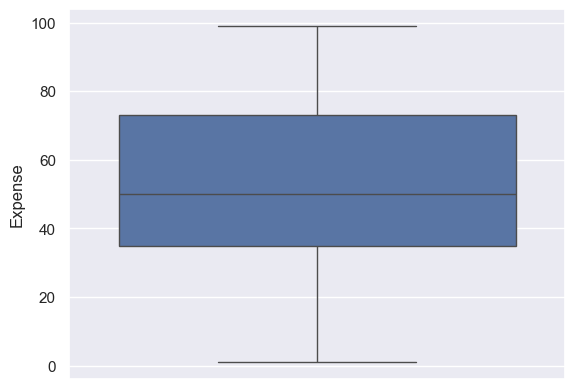

In [8]:
sns.boxplot(df["Expense"])

<Axes: ylabel='Income(k$)'>

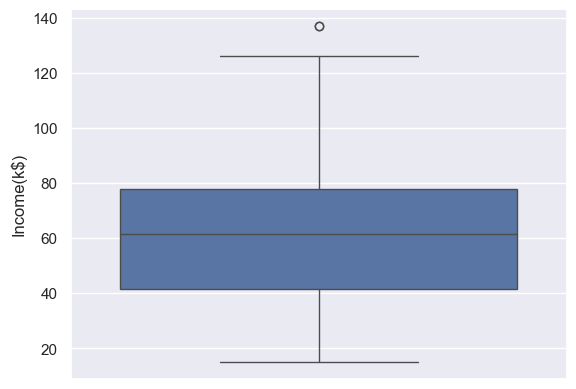

In [9]:
sns.boxplot(df["Income(k$)"])   #outlier is found

In [10]:
x=df[df["Income(k$)"]>130]        #drop the outliers with their index
print(x)

      Id   Sex  Age  Income(k$)  Expense
198  199  Male   32         137       18
199  200  Male   30         137       83


In [11]:
df.drop(index=x.index,inplace=True)
df.head()

,Id,Sex,Age,Income(k$),Expense
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.shape

(198, 5)

<Axes: xlabel='Income(k$)', ylabel='Expense'>

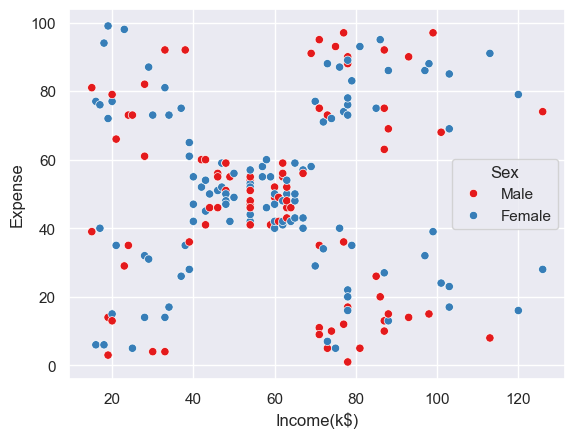

In [13]:
sns.scatterplot(x=df['Income(k$)'],y=df['Expense'],hue=df['Sex'],palette='Set1')   #Sex is not helpful for clustering

In [14]:
#df['Sex']=df['Sex'].map({"Female":1,"Male":0})
#df.head()

In [15]:
df.drop(['Sex','Id'],axis=1,inplace=True)   #dropping unwanted columns
df.head()

,Age,Income(k$),Expense
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


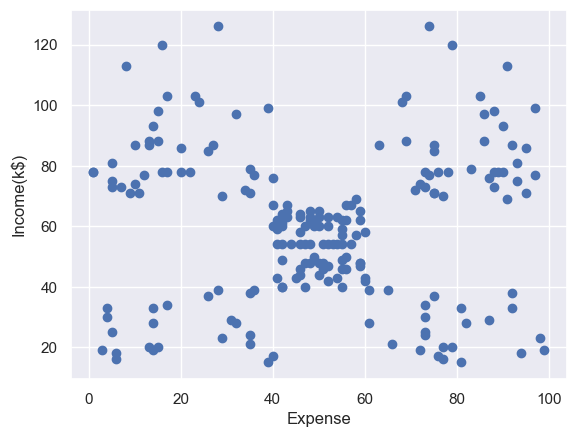

In [16]:
plt.scatter(df['Expense'],df['Income(k$)'])
plt.xlabel("Expense")
plt.ylabel("Income(k$)")
plt.show()

In [18]:
from sklearn.cluster import KMeans

In [19]:
#with the above scatterplot, we can divide the data into 5 clusters
fmodel=KMeans(n_clusters=5)
fmodel.fit(df)

KMeans(n_clusters=5)

In [20]:
new=df.copy()
new['Group']=fmodel.predict(df)
new.head()

,Age,Income(k$),Expense,Group
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4


VISUALIZING THE GROUPS

<Axes: xlabel='Income(k$)', ylabel='Expense'>

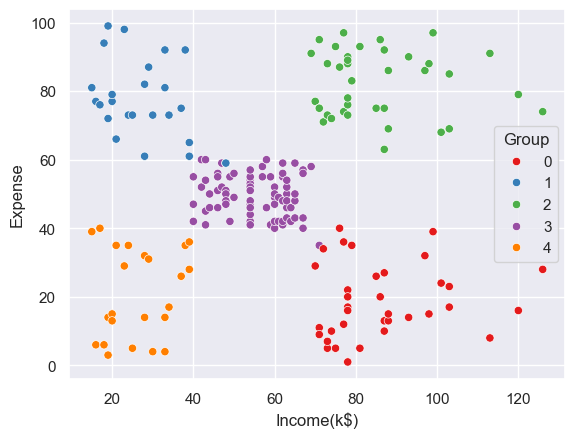

In [21]:
sns.scatterplot(x=new['Income(k$)'],y=new['Expense'],hue=new['Group'],palette='Set1')